In [1]:
# Basic Libraries
#NumPy : Library for Numeric Computations in Python
#Pandas : Library for Data Acquisition and Preparation
#Matplotlib : Low-level library for Data Visualization
#Seaborn : Higher-level library for Data Visualization
#Counter: for counting frequency of occurence of an item

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from collections import Counter

sb.set(palette='icefire') # set the default Seaborn style for graphics

In [2]:
data_raw = pd.read_csv('./data/Final_Movie_Data_clean.csv').drop('Unnamed: 0', axis=1)
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1838 entries, 0 to 1837
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tmdb_id            1838 non-null   int64  
 1   imdb_id            1838 non-null   object 
 2   film               1838 non-null   object 
 3   year               1838 non-null   int64  
 4   budget             1838 non-null   float64
 5   revenue            1838 non-null   float64
 6   oscar_cat          1838 non-null   object 
 7   oscar_win          1838 non-null   bool   
 8   oscar_nominations  1838 non-null   int64  
 9   oscar_win_count    1838 non-null   int64  
 10  total_wins         1838 non-null   int64  
 11  total_nominations  1838 non-null   int64  
 12  cast_popularity    1838 non-null   float64
 13  crew_popularity    1838 non-null   float64
 14  tmdb_vote_average  1838 non-null   int64  
 15  tmdb_vote_count    1838 non-null   int64  
 16  imdb_rating        1838 

In [3]:
data_raw = data_raw.convert_dtypes()
data_numeric = data_raw.select_dtypes(['int64','float64'])

In [ ]:
## this takes 1-3 minutes to complete
#f = sb.pairplot(data = data_numeric)#[['cast_popularity','crew_popularity']])

In [ ]:
## this takes a minute
#f.savefig('./data/numeric.png',bbox_inches='tight',dpi=300)

In [25]:
data_raw.dropna(axis=0, subset=['genre_id_0'], inplace=True)

In [35]:
## renaming genre id to actual genre names
genre_id_name = {
    28:'Action',
    12:'Adventure',
    16:'Animation',
    35:'Comedy',
    80:'Crime',
    99:'Documentary',
    18:'Drama',
    10751:'Famiily',
    14:'Fantasy',
    36:'History',
    27:'Horror',
    10402:'Music',
    9648:'Mystery',
    10749:'Romance',
    878:'Science Fiction',
    10770:'TV Movie',
    53:'Thriller',
    10752:'War',
    37:'Western'
}
for item in ['genre_id_0','genre_id_1']:
    data_raw[item].replace(genre_id_name, inplace=True)

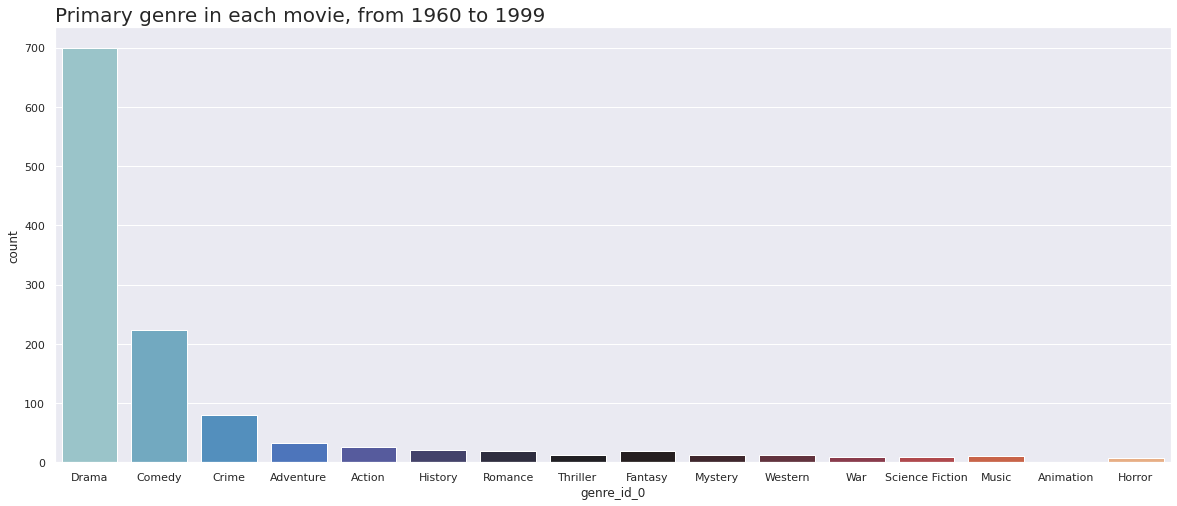

In [146]:
## Visualing the main genre of each movie
data_1960 = data_raw[data_raw['year']<2000]
f = plt.figure(figsize=(20,8))
sb.countplot(data=data_1960, x='genre_id_0', order=data_raw['genre_id_0'].value_counts().index, palette='icefire')
plt.title("Primary genre in each movie, from 1960 to 1999", loc='left',fontsize='20')
plt.show()
## comment below line out after exporting to png
#f.savefig('./images/genres_1960-1999.png',bbox_inches='tight',dpi=600)

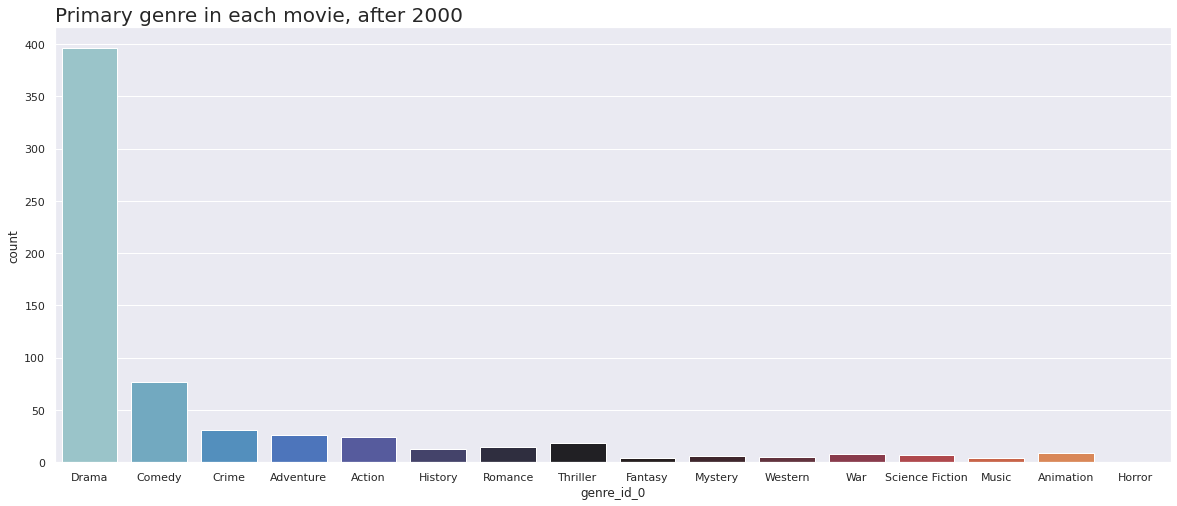

In [162]:
data_2000 = data_raw[data_raw['year']>=2000]
## Visualing the main genre of each movie, after year 2000
f = plt.figure(figsize=(20,8))
sb.countplot(data=data_2000, x='genre_id_0', order=data_raw['genre_id_0'].value_counts().index,palette='icefire')
plt.title("Primary genre in each movie, after 2000", loc='left',fontsize='20')
plt.show()
## comment below line out after exporting to png
#f.savefig('./images/genres_2000.png',bbox_inches='tight',dpi=600)

In [78]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1836 entries, 0 to 1837
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tmdb_id            1836 non-null   Int64  
 1   imdb_id            1836 non-null   string 
 2   film               1836 non-null   string 
 3   year               1836 non-null   Int64  
 4   budget             1836 non-null   float64
 5   revenue            1836 non-null   float64
 6   oscar_cat          1836 non-null   string 
 7   oscar_win          1836 non-null   boolean
 8   oscar_nominations  1836 non-null   Int64  
 9   oscar_win_count    1836 non-null   Int64  
 10  total_wins         1836 non-null   Int64  
 11  total_nominations  1836 non-null   Int64  
 12  cast_popularity    1836 non-null   float64
 13  crew_popularity    1836 non-null   float64
 14  tmdb_vote_average  1836 non-null   Int64  
 15  tmdb_vote_count    1836 non-null   Int64  
 16  imdb_rating        1836 

In [147]:
freq_2000 = Counter(data_2000['genre_id_0'])
freq_1960 = Counter(data_raw[data_raw['year']<2000]['genre_id_0'])
#display(freq_2000)
#display(freq_1960)

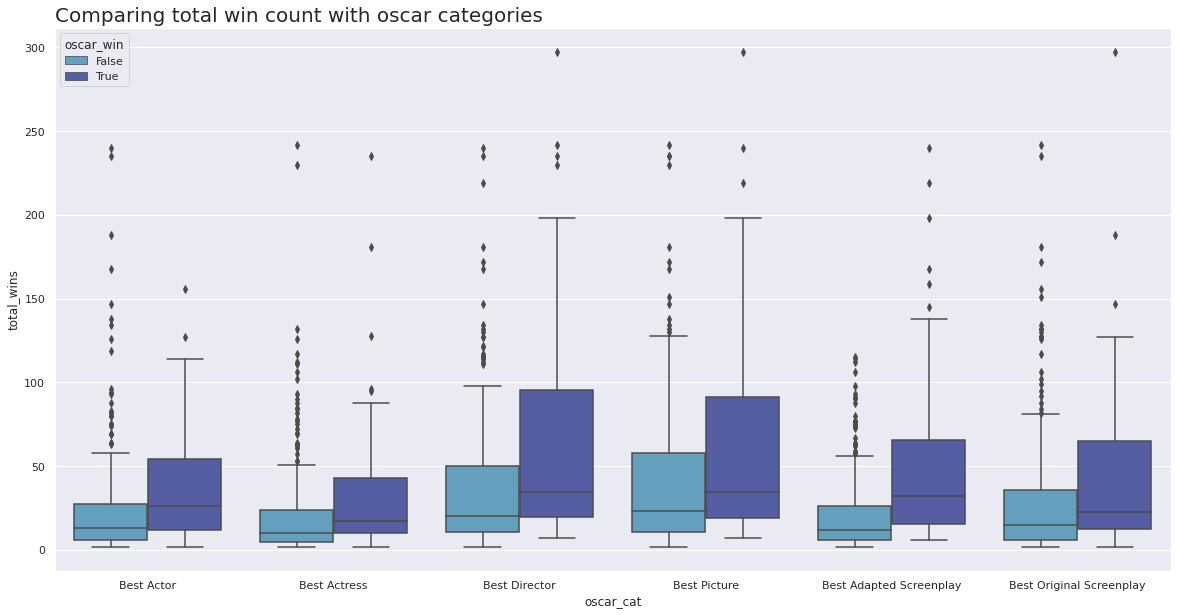

In [138]:
f=plt.figure(figsize=(20,10))
sb.boxplot(data=data_raw, y='total_wins', x='oscar_cat', hue='oscar_win',)#palette='icefire_r')
plt.title("Comparing total win count with oscar categories", loc='left',fontsize=20)
## comment below line out after exporting to png
#f.savefig('./images/win-count_oscar-cat.png',bbox_inches='tight',dpi=600)

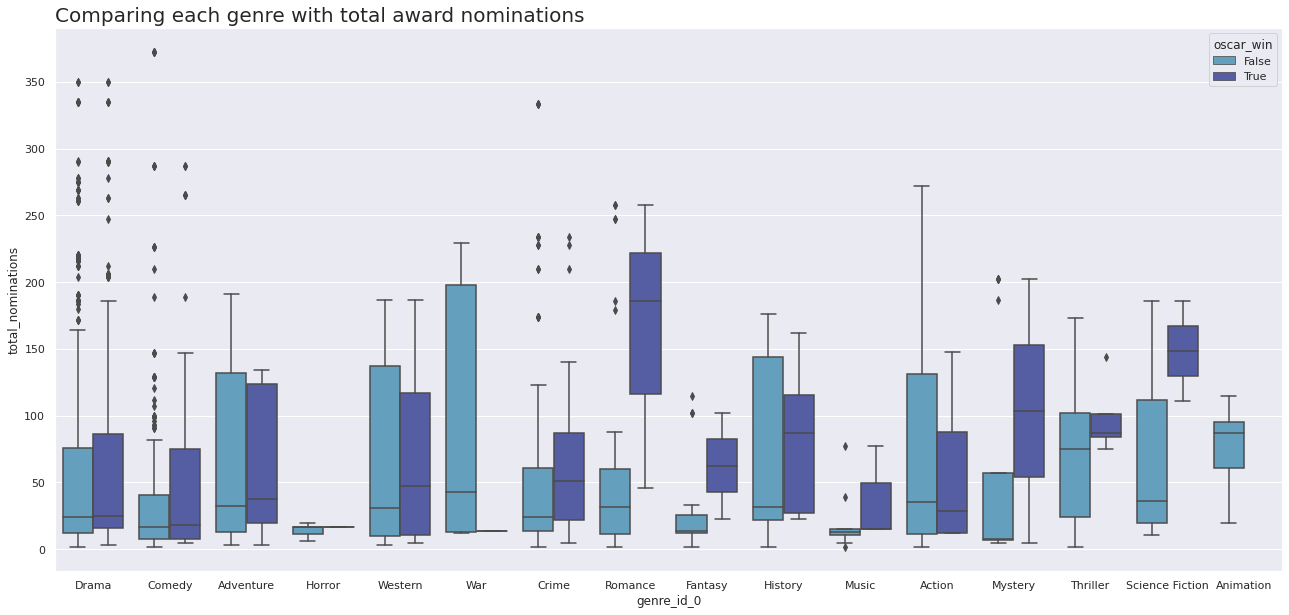

In [156]:
f=plt.figure(figsize=(22,10))
sb.boxplot(data=data_raw, y='total_nominations', x='genre_id_0', hue='oscar_win')
plt.title("Comparing each genre with total award nominations", loc='left', fontsize=20)
## comment below line out after exporting to png
#f.savefig('./images/genre_award_nom.png',bbox_inches='tight',dpi=600)

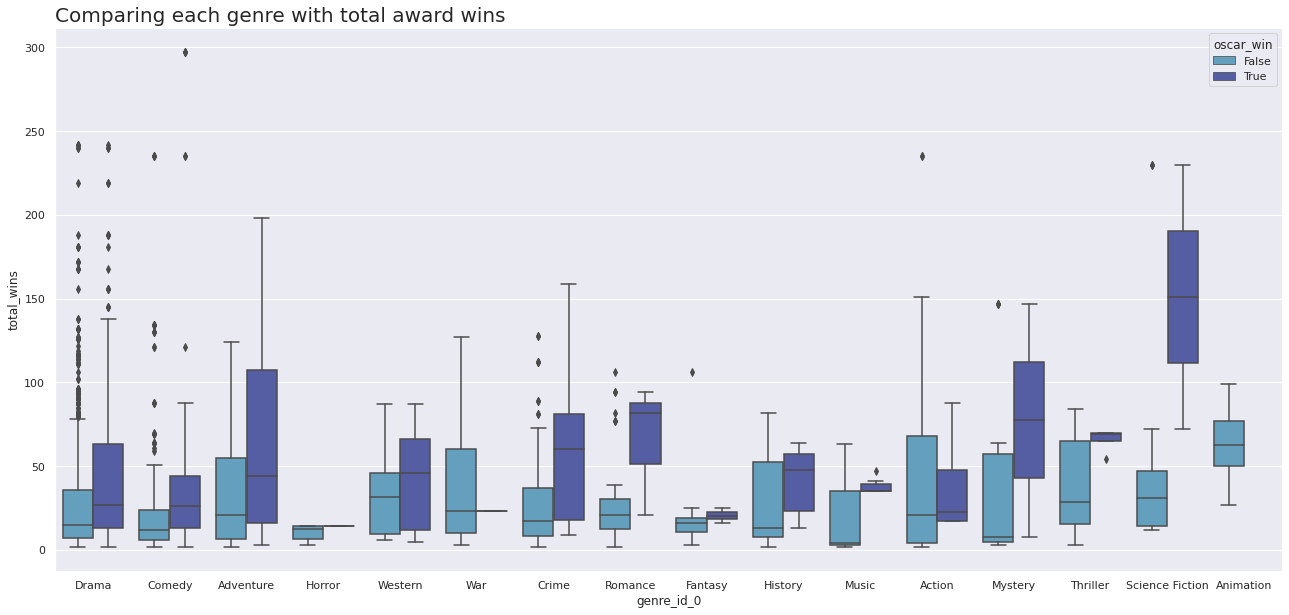

In [155]:
f=plt.figure(figsize=(22,10))
sb.boxplot(data=data_raw, y='total_wins', x='genre_id_0', hue='oscar_win')
plt.title("Comparing each genre with total award wins", loc='left', fontsize=20)
## comment below line out after exporting to png
#.savefig('./images/genre_award_win.png',bbox_inches='tight',dpi=600)

<AxesSubplot:ylabel='tmdb_vote_average'>

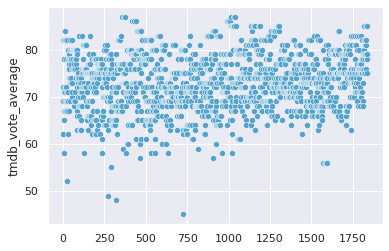

In [116]:
sb.scatterplot(data=data_raw['tmdb_vote_average'])